<a href="https://colab.research.google.com/github/TinaSorensen/CALDISS-SDS-phd-19/blob/master/Portfolio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



In [0]:
#Import all packages used in this portfolio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA #Used for PCA analysis
from sklearn.preprocessing import StandardScaler #Used to scale the data
from sklearn.model_selection import train_test_split #Used for splitting data in train and test data
from sklearn.model_selection import cross_val_score #Used for measuring the performance of model using k-fold cross validation
from sklearn.metrics import classification_report #Used for evaluation of model
from sklearn.linear_model import LogisticRegression #Used for fitting a logistic regression
from mlxtend.plotting import plot_confusion_matrix #Used to plot a confusion matrix
from sklearn.ensemble import RandomForestClassifier #Used for fitting a random forest
from sklearn.linear_model import LinearRegression #Used for fittig a linear regression
import xgboost as xgb #Used for fitting a xgboost

In [0]:
turnover = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [0]:
turnover.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [0]:
turnover.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [0]:
turnover_sub=turnover.loc[:,'satisfaction':'promotion']

In [0]:
turnover.isnull().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

In [0]:
#Recode salary to numeric value to use it in a PCA analysis
salary_mapper={'low':0,'medium':1,'high':2}

In [0]:
turnover['salary_recode']=turnover.salary.map(salary_mapper)

In [0]:
turnover['salary_recode'].unique()

array([0, 1, 2])

In [0]:
turnover.department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

In [0]:
#Department values are transformed to dummy values
dep_matrix=pd.get_dummies(turnover.department)

In [0]:
turnover_all=pd.concat([turnover,dep_matrix],axis=1)

In [0]:
turnover_sub=turnover_all.drop(['department','salary','churn'],axis=1)

In [0]:
# Import the functions we need
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library

In [0]:
# Let's standard-scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(turnover_sub)

In [0]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=turnover_sub.columns).describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,salary_recode,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,-1.789799e-17,-4.257767e-16,-4.071089e-18,-4.978720e-16,-6.144617e-15,5.792368e-15,1.110996e-14,7.034620e-15,8.788519e-16,-5.261302e-15,7.376295e-16,-5.301890e-15,-9.106719e-15,1.061174e-15,4.346317e-15,3.540663e-16,1.171171e-15,6.020260e-15
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.102922e+00,-2.080478e+00,-1.462863e+00,-2.103471e+00,-1.026126e+00,-4.111653e-01,-1.474118e-01,-9.333679e-01,-2.984859e-01,-2.353205e-01,-2.321479e-01,-2.276473e-01,-2.093905e-01,-2.463222e-01,-2.529530e-01,-6.174549e-01,-4.177915e-01,-4.706553e-01
25%,-6.951648e-01,-9.120042e-01,-6.515376e-01,-9.020633e-01,-3.412352e-01,-4.111653e-01,-1.474118e-01,-9.333679e-01,-2.984859e-01,-2.353205e-01,-2.321479e-01,-2.276473e-01,-2.093905e-01,-2.463222e-01,-2.529530e-01,-6.174549e-01,-4.177915e-01,-4.706553e-01
50%,1.092680e-01,2.277508e-02,1.597876e-01,-2.103137e-02,-3.412352e-01,-4.111653e-01,-1.474118e-01,6.360923e-01,-2.984859e-01,-2.353205e-01,-2.321479e-01,-2.276473e-01,-2.093905e-01,-2.463222e-01,-2.529530e-01,-6.174549e-01,-4.177915e-01,-4.706553e-01
75%,8.332576e-01,8.991306e-01,9.711129e-01,8.800240e-01,3.436553e-01,-4.111653e-01,-1.474118e-01,6.360923e-01,-2.984859e-01,-2.353205e-01,-2.321479e-01,-2.276473e-01,-2.093905e-01,-2.463222e-01,-2.529530e-01,1.619551e+00,-4.177915e-01,-4.706553e-01
max,1.557247e+00,1.658639e+00,2.593763e+00,2.181549e+00,4.452998e+00,2.432112e+00,6.783716e+00,2.205553e+00,3.350242e+00,4.249523e+00,4.307599e+00,4.392761e+00,4.775766e+00,4.059723e+00,3.953303e+00,1.619551e+00,2.393538e+00,2.124697e+00


In [0]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [0]:
# Fitr the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

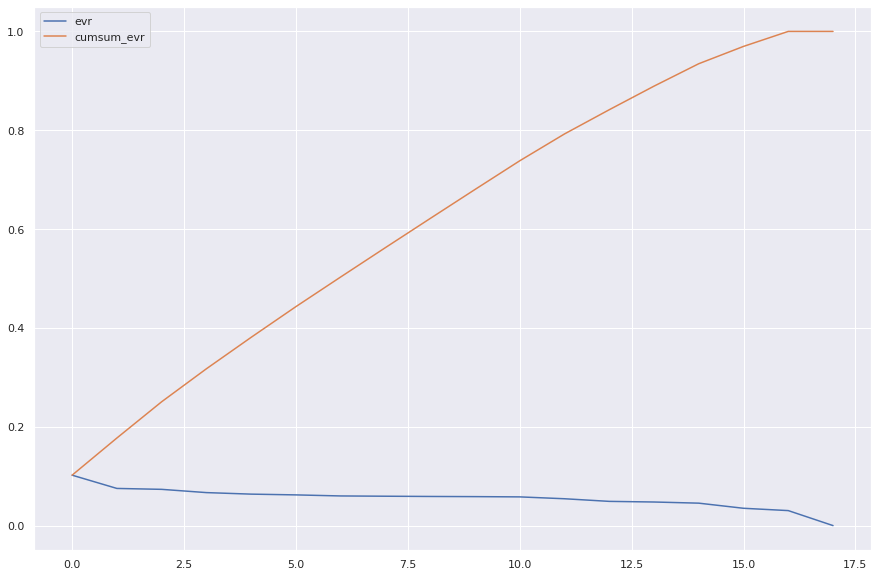

In [0]:
import numpy as np
import seaborn as sns
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

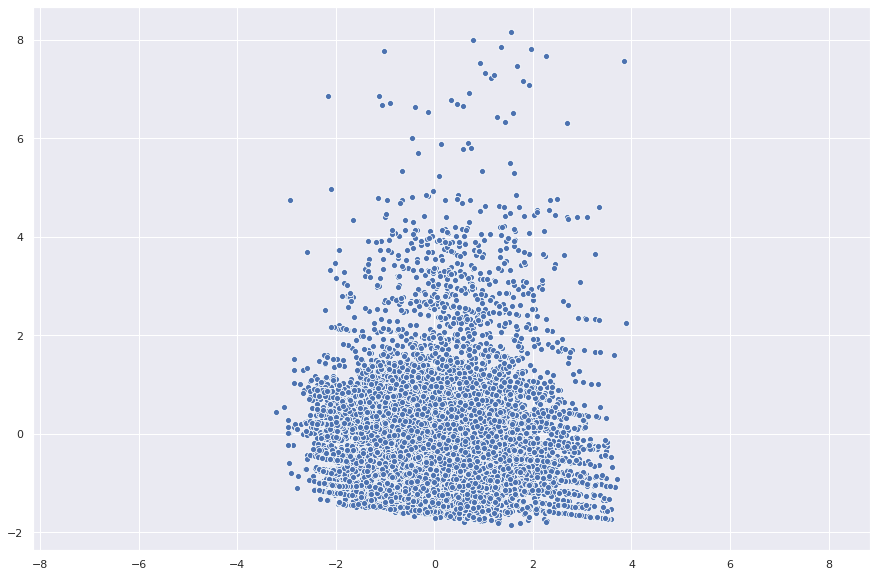

In [0]:
import matplotlib.pyplot as plt
# Scatter plot of the first 2 componentws
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

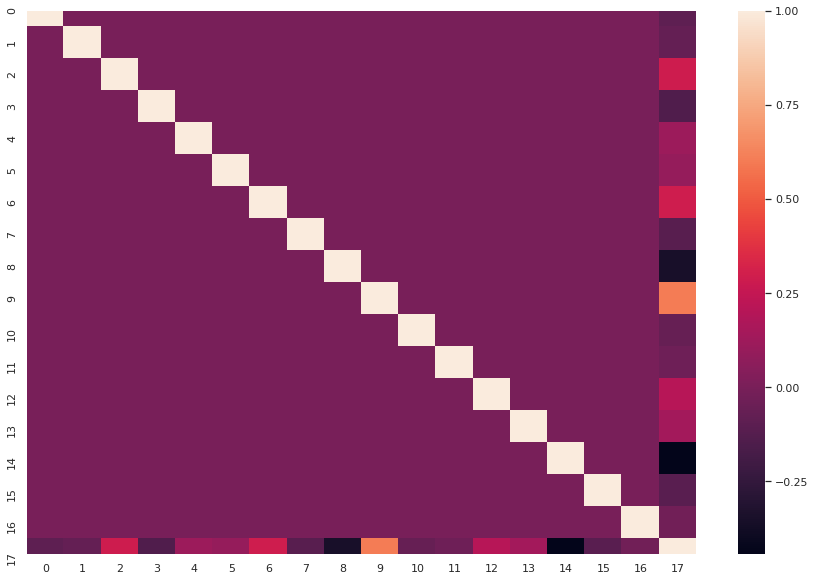

In [0]:
# Correlation of the components
sns.heatmap(pd.DataFrame(data_reduced).corr())

In [0]:
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

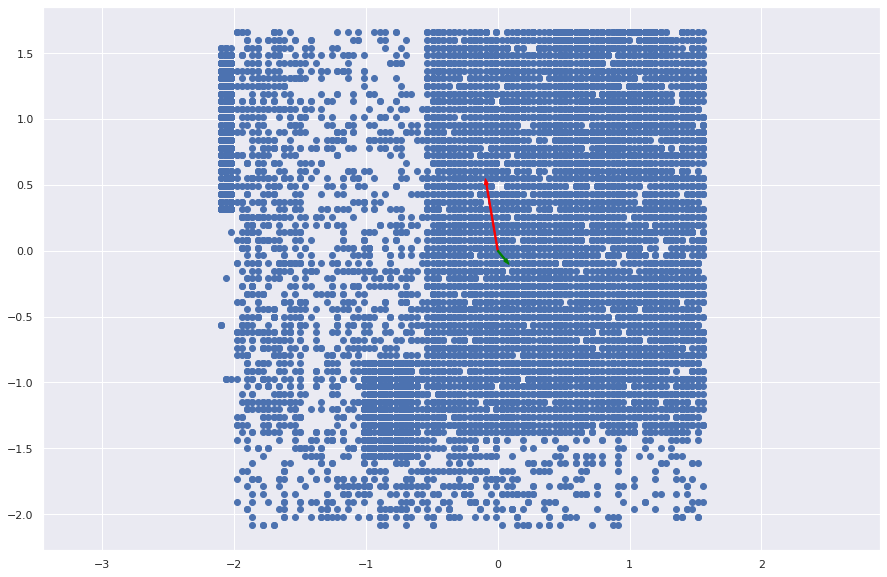

In [0]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,0], data_scaled[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

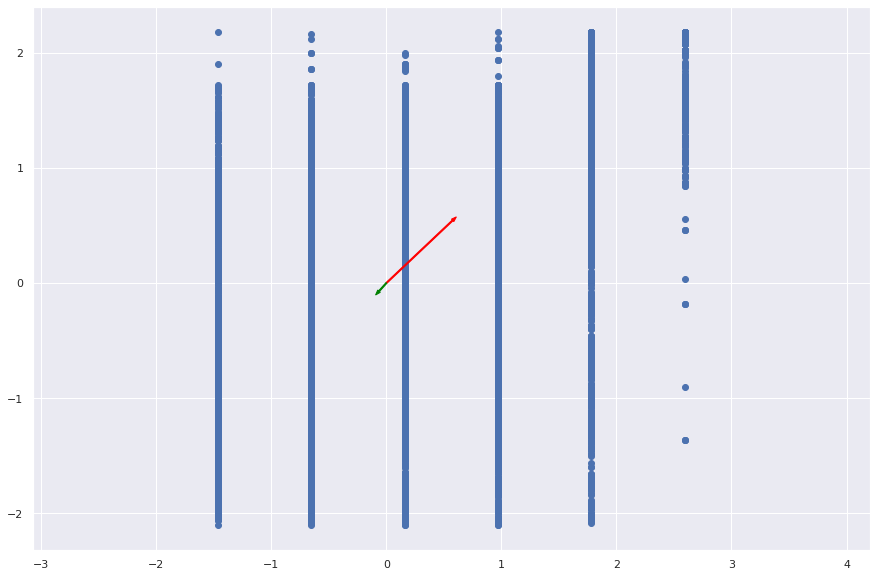

In [0]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,2], data_scaled[:,3])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [0]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=turnover_sub.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

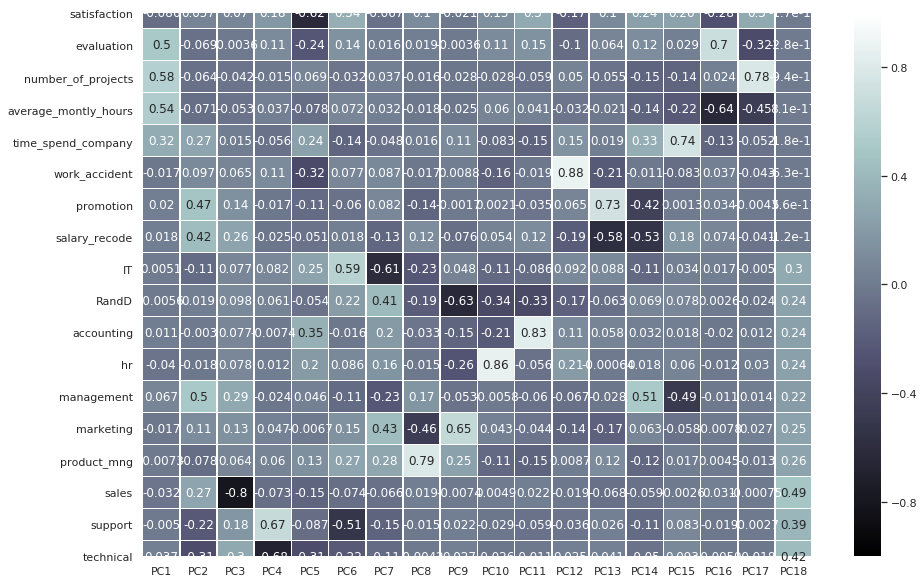

In [0]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

##Supervised

In [0]:
turnover_all

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary,salary_recode,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,0,0,0,0,0,0,0,0,1,0


In [0]:
turnover_all=pd.concat([turnover,dep_matrix],axis=1)

In [0]:
# Select the (independant) features that we are going to use to train the model
X = turnover_all.drop(['churn','salary','department'],axis=1)

In [0]:
# Define the dependant variabel / target to predict (world region)
y = turnover.churn

In [0]:
y.unique()

array([1, 0])

In [0]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [0]:
# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

###Logistic Regression (Churn)

In [0]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.78916667 0.795      0.79416667 0.8025     0.78449354]
0.7886666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

The overall accuracy is at 79%. It performs almost equally well on the k folds created in the k-fold cross validation.

In [0]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
# Performance evaluation using the classification_report

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.58      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000



It is not good at predicting who actually quit their job (churn=1).

In [0]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.3MB 5.0MB/s 


In [0]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f10bbbc1978>)

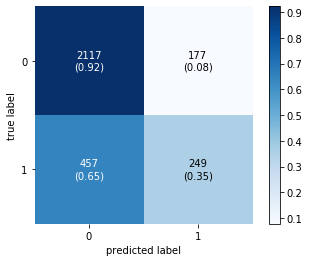

In [0]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                               )

###Random forest (Churn)

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

[0.9875     0.98625    0.98541667 0.98625    0.98791163]
0.9846666666666667


The test-score is well within the values produced in the crossvalidation Overall performance goes up (as expected)

In [0]:
# Performance evaluation using the classification_report

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2294
           1       0.99      0.95      0.97       706

    accuracy                           0.98      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.98      0.98      0.98      3000



(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f10b9eea320>)

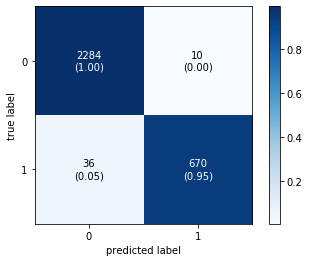

In [0]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True)

The performance is much better using random forest. The correct classification of the person who quit their job (churn=1) improves a lot using random forest

###Linear regression (Satisfaction)

In [0]:
# Select the (independant) features that we are going to use to train the model
X = turnover_all.drop(['salary','department','satisfaction'],axis=1)

In [0]:
# Define the dependant variabel / target to predict (world region)
y = turnover.satisfaction
y

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction, Length: 14999, dtype: float64

In [0]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [0]:
# We need to creat new train / test splits here - as the nomad_score was not part of the previous split.

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y, turnover_all, test_size = 0.2, random_state = 42)

In [0]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

0.18243739731539088


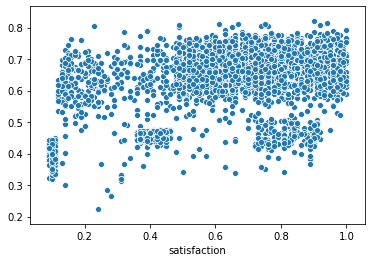

In [0]:
# We can also inspect our results visually
import seaborn as sns
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [0]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4344812388552053


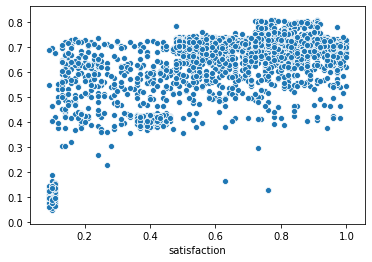

In [0]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)